In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../dataset.csv")

In [3]:
def normalize(df):
    df = (df - df.min()) / (df.max() - df.min())
    
    return df

In [4]:
df = normalize(df)

In [5]:
df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.693467       0.508197       0.318182  0.000000  0.416873   
1     0.000000  0.422111       0.672131       0.281818  0.168011  0.473945   
2     0.000000  0.728643       0.000000       0.000000  0.000000  0.548387   
3     0.000000  0.678392       0.557377       0.381818  0.336022  0.524814   
4     0.058824  0.698492       0.508197       0.372727  0.645161  0.504963   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.020922  0.433333      1.0  
1                  0.066183  0.033333      0.0  
2                  0.235696  0.166667      1.0  
3                  0.122545  0.050000      1.0  
4                  0.195559  0.000000      0.0

In [6]:
import numpy as np

In [7]:
columns = df.columns
target = 'Outcome'
X = df[[column for column in columns if column != target]].to_numpy()
y = df[target].astype(int).to_numpy()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
kNN_model = KNeighborsClassifier(n_neighbors=3)
logistic_model = LogisticRegression()

In [11]:
kNN_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [12]:
predicted_probab_kNN = kNN_model.predict_proba(X_test)
predicted_probab_logistic = logistic_model.predict_proba(X_test)

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [14]:
fpr_kNN, tpr_kNN, thresh_kNN = roc_curve(y_test, predicted_probab_kNN[:, 1], pos_label=1)
fpr_logistic, tpr_logistic, thresh_logistic = roc_curve(y_test, predicted_probab_logistic[:, 1], pos_label=1)

In [15]:
auc_kNN = roc_auc_score(y_test, predicted_probab_kNN[:, 1])
auc_logistic = roc_auc_score(y_test, predicted_probab_logistic[:, 1])

In [16]:
print(f"Accuracy kNN: {auc_kNN}\nAccuracy Logistic Regression: {auc_logistic}")

Accuracy kNN: 0.8927371620540714
Accuracy Logistic Regression: 0.822748360262358


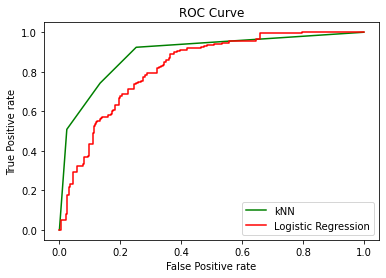

In [17]:
plt.plot(fpr_kNN, tpr_kNN, color="green", label="kNN")
plt.plot(fpr_logistic, tpr_logistic, color="red", label="Logistic Regression")
plt.title("ROC Curve")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend(loc='best')
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted_probab_kNN[:, 1].round())

array([[285,  44],
       [ 44, 127]], dtype=int64)

In [19]:
confusion_matrix(y_test, predicted_probab_logistic[:, 1].round())

array([[289,  40],
       [ 78,  93]], dtype=int64)